In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=14,5
import os

In [ ]:
raw_data = pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL.xlsx")
df_consumer  =pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL Jamia data.xlsx")
df_daily0 = pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL-prepaid_data_daily_log_grid (1).xlsx")
df_daily1 = pd.read_excel(r"c:\Users\HARSH\Downloads\NPCL-prepaid_data_daily_log_grid.xlsx")


In [24]:

columns = ['creation_time', 'R_Voltage', 'Y_Voltage', 'B_Voltage', 'R_Current', 'Y_Current',
            'B_Current', 'A', 'BlockEnergy-WhExp', 'B', 'C', 'D', 'BlockEnergy-VAhExp',
            'KWh', 'BlockEnergy-VArhQ1', 'BlockEnergy-VArhQ4', 'BlockEnergy-VAhImp']

main_df = raw_data.iloc[:, 0].str.split(',', expand=True)
main_df.columns = columns  # Assign column names
df = main_df.drop([
    'BlockEnergy-WhExp', 'A', 'B', 'C', 'D', 'BlockEnergy-VAhExp', 'BlockEnergy-VAhExp', 'BlockEnergy-VArhQ1',
    'BlockEnergy-VArhQ4', 'BlockEnergy-VAhImp'], axis=1)
pd.set_option('display.max_columns', None)

df['creation_time'] = pd.to_datetime(df['creation_time'])
df['KWh'] = df['KWh'].astype(float)/1000
df['R_Voltage'] = df['R_Voltage'].astype(float)
df['Y_Voltage'] = df['Y_Voltage'].astype(float)
df['B_Voltage'] = df['B_Voltage'].astype(float)
df['R_Current'] = df['R_Current'].astype(float)
df['Y_Current'] = df['Y_Current'].astype(float)
df['B_Current'] = df['B_Current'].astype(float)
# print(df.tail())
df.set_index("creation_time",drop=True,inplace=True)
df

,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh
creation_time,,,,,,,
2022-12-12 00:30:00,6463.0,6430.0,6467.0,3.65,3.69,4.45,33.3
2022-12-12 01:00:00,6442.0,6409.0,6447.0,3.72,3.98,4.17,33.2
2022-12-12 01:30:00,6446.0,6413.0,6452.0,3.24,3.23,3.94,28.4
2022-12-12 02:00:00,6462.0,6429.0,6468.0,3.12,3.32,4.01,27.7
2022-12-12 02:30:00,6467.0,6432.0,6474.0,3.29,3.19,4.13,27.2
...,...,...,...,...,...,...,...
2024-11-16 22:00:00,6425.0,6476.0,6452.0,7.70,8.42,9.41,76.9
2024-11-16 22:30:00,6431.0,6484.0,6458.0,8.74,10.23,10.86,88.6
2024-11-16 23:00:00,6432.0,6483.0,6456.0,7.52,8.76,9.15,76.3


In [33]:
daily_load_profile_data = [((f"{y}-{m}-{d}"),
                            # len(df['KWh'].loc[(df.index.year == y)&(df.index.month == m)& (df.index.day==d)]),
                            df['KWh'].loc[(df.index.year == y)&(df.index.month == m)& (df.index.day==d)].sum()) 
                            for y in (2023,2024) 
                                for m in range(1,13) 
                                    for d in df[['KWh']].loc[(df.index.year == y)&(df.index.month == m)].index.day.unique()]

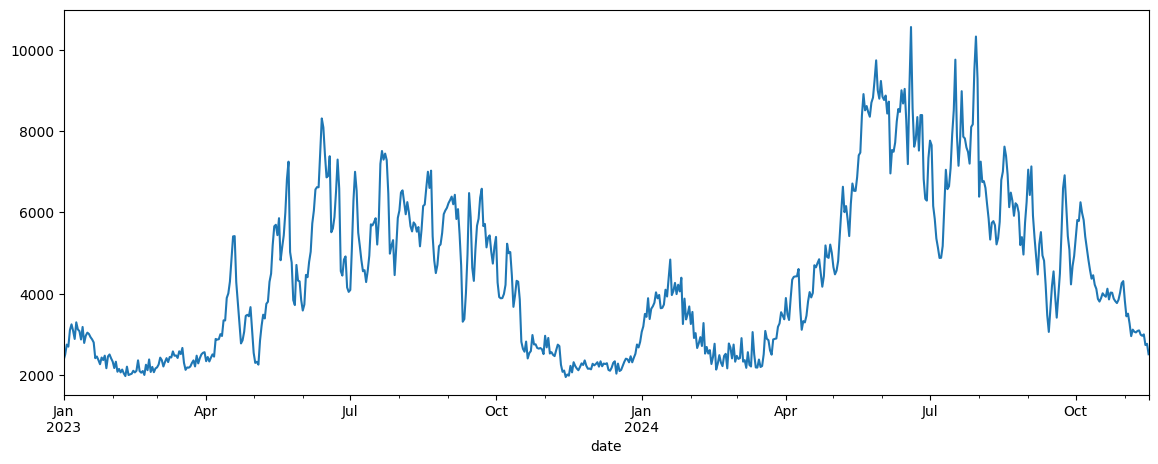

,consumption
date,
2023-01-01,2358.4
2023-01-02,2500.5
2023-01-03,2743.3
2023-01-04,2692.9
2023-01-05,3101.3
...,...
2024-11-12,2959.9
2024-11-13,2994.2
2024-11-14,2732.3


In [ ]:
ht_df = pd.DataFrame(daily_load_profile_data,columns=["date","consumption"])
ht_df['date'] = pd.to_datetime(ht_df['date'])
ht_df = ht_df.drop(ht_df.index[-1])
ht_df.set_index("date",drop=True, inplace=True)
ht_df['consumption'].plot()
plt.show()
ht_df

In [101]:
df_daily = pd.concat([df_daily0,df_daily1])
df_daily['consumption'] = df_daily[df_daily.columns[2:26]].sum(axis=1)
# df_daily['consumption_from_reading'] = df_daily['unit_grid_closing']-df_daily['unit_grid_opening']
df_daily.drop(df_daily.columns[2:28],axis=1,inplace=True)
df_daily.set_index("log_date",drop=True,inplace=True)
# # df_daily.loc[df_daily['consumption_from_reading'] < 0, 'consumption_from_reading'] = 0
# df_daily.loc[df_daily[df_daily['consumption_from_reading'] < 0].index, 'consumption_from_reading'] = df_daily.loc[df_daily[df_daily['consumption_from_reading'] < 0].index, 'consumption']

# plt.plot(df_daily.index, df_daily['consumption'], color='red', label='consumption')
# plt.show()
# plt.plot(df_daily.index, df_daily['consumption_from_reading'], color='blue', label='consumption_from_reading') 
# plt.show()
df_daily = df_daily.round(2)
df_daily

,location_id,consumption
log_date,,
2023-01-01 05:30:10,100010010101,4.18
2023-01-02 05:30:10,100010010101,3.00
2023-01-03 05:30:10,100010010101,2.00
2023-01-04 05:30:10,100010010101,2.00
2023-01-05 05:30:10,100010010101,4.00
...,...,...
2024-11-15 05:30:10,100010020908,4.00
2024-11-16 05:30:10,100010020908,2.00
2024-11-17 05:30:10,100010020908,4.00


In [99]:
df_daily[df_daily['consumption'] != df_daily['consumption_from_reading']]


,location_id,consumption,consumption_from_reading
log_date,,,


In [100]:
df_daily.loc[(df_daily.index == "2024-05-15 05:30:10")&(df_daily['location_id']==100010020405)]

,location_id,consumption,consumption_from_reading
log_date,,,
2024-05-15 05:30:10,100010020405,4.0,4.0


In [107]:
df2 = pd.DataFrame([(date,len(data),data['consumption'].sum()) for date, data in df_daily.groupby(df_daily.index)],columns=['date','consumer_no',"total_consumption"])
df2

,date,consumer_no,total_consumption
0,2023-01-01 05:30:10,68,204.22
1,2023-01-02 05:30:10,68,280.76
2,2023-01-03 05:30:10,68,292.00
3,2023-01-04 05:30:10,68,299.92
4,2023-01-05 05:30:10,68,358.00
...,...,...,...
684,2024-11-15 05:30:10,70,260.00
685,2024-11-16 05:30:10,70,225.00
686,2024-11-17 05:30:10,70,245.00
687,2024-11-18 05:30:10,70,237.00


In [ ]:
data['consumption'].sum(
)

152.0

In [98]:
# df_daily[df_daily['consumption_from_reading']<0,"consumption_from_reading"]==0


In [116]:
# df2['ht_data'] = 
ht_df

,date,consumption
0,2023-01-01,2358.4
1,2023-01-02,2500.5
2,2023-01-03,2743.3
3,2023-01-04,2692.9
4,2023-01-05,3101.3
...,...,...
681,2024-11-12,2959.9
682,2024-11-13,2994.2
683,2024-11-14,2732.3
684,2024-11-15,2762.5


In [114]:
df2

,date,consumer_no,total_consumption,ht_data
0,2023-01-01 05:30:10,68,204.22,NaN
1,2023-01-02 05:30:10,68,280.76,NaN
2,2023-01-03 05:30:10,68,292.00,NaN
3,2023-01-04 05:30:10,68,299.92,NaN
4,2023-01-05 05:30:10,68,358.00,NaN
...,...,...,...,...
684,2024-11-15 05:30:10,70,260.00,NaN
685,2024-11-16 05:30:10,70,225.00,NaN
686,2024-11-17 05:30:10,70,245.00,NaN
687,2024-11-18 05:30:10,70,237.00,NaN


In [115]:
ht_df.reset_index(inplace=True)

In [58]:
import pandas as pd

# Example DataFrame with date columns
data = {
    'start_date': ['2023-01-01'],
    'end_date': ['2024-11-19']
}
df = pd.DataFrame(data)

# Convert columns to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Calculate the number of days between the dates
df['days_difference'] = (df['end_date'] - df['start_date']).dt.days

print(df)


  start_date   end_date  days_difference
0 2023-01-01 2024-11-19              688
